<img src="https://cekumagroup.cas.lehigh.edu/sites/cekumagroup.cas2.lehigh.edu/files/image10.jpg "/>

# About the dataset 
## Loan Risk Analysis
    
# Problem Statement
* PeerLoanKart is anNBFC (Non-BankingFinancial Company) which facilitates peer to peer loan. It connects people who need money (borrowers) with people who have money (investors). As an investor,you would want to invest in people who showed a profile of having a high probability of paying you back.

# Goal 
* Create a model that will help predict whether a borrower will pay the loan or not.
* Comparing accuracy, comfusion matrix and reports of 3 different models


*Notes*
- credit.policy: 1 if the customer meets the credit underwriting criteria of PeerLoanKart, and 0 otherwise
- purpose: Purpose of the loan ("credit_card","debt_consolidation","educational","major_purchase","small_business","all_other")
- int.rate: Interest rate of the loan, as a proportion (e.i.: 11% -> 0.11). Borrowers judged to be more risky are assigned higher interest rates
- installment: The monthly installments owed by the borrower if the loan is funded
- log.annual.inc: The natural log of the self-reported annual income of the borrower
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income)
- fico: The FICO credit score of the borrower
- days.with.cr.line: The number of days the borrower has had a credit line
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)
- revol.util: The borrower's revolving line utilization rate (amount of the credit line used relative to total credit available)
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)
- not.fully.paid: This is the output field. Please note that 1 means borrower is not going to pay the loan completely
 
**Happy reading!**

* * *

In [1]:
# Import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Data analysis and visualization 
import seaborn as sns

# Handle NaN
from sklearn.impute import SimpleImputer

# Sklearn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,RocCurveDisplay
from sklearn import tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC

In [2]:
# Read the data
df_loan = pd.read_csv('loan_borowwer_data.csv')

In [3]:
df_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df_loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df_loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
# No NaN. Check for the data types
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
# Only one categorical entry. Use Label encoder to handle it
categorical_variables = ['purpose']
# Use label encoding
enc = LabelEncoder()
for c in categorical_variables:
    print(f"Label Encoding: {c} - {df_loan[c].nunique()}")
    df_loan[c] = enc.fit_transform(df_loan[c])

Label Encoding: purpose - 7


<AxesSubplot:>

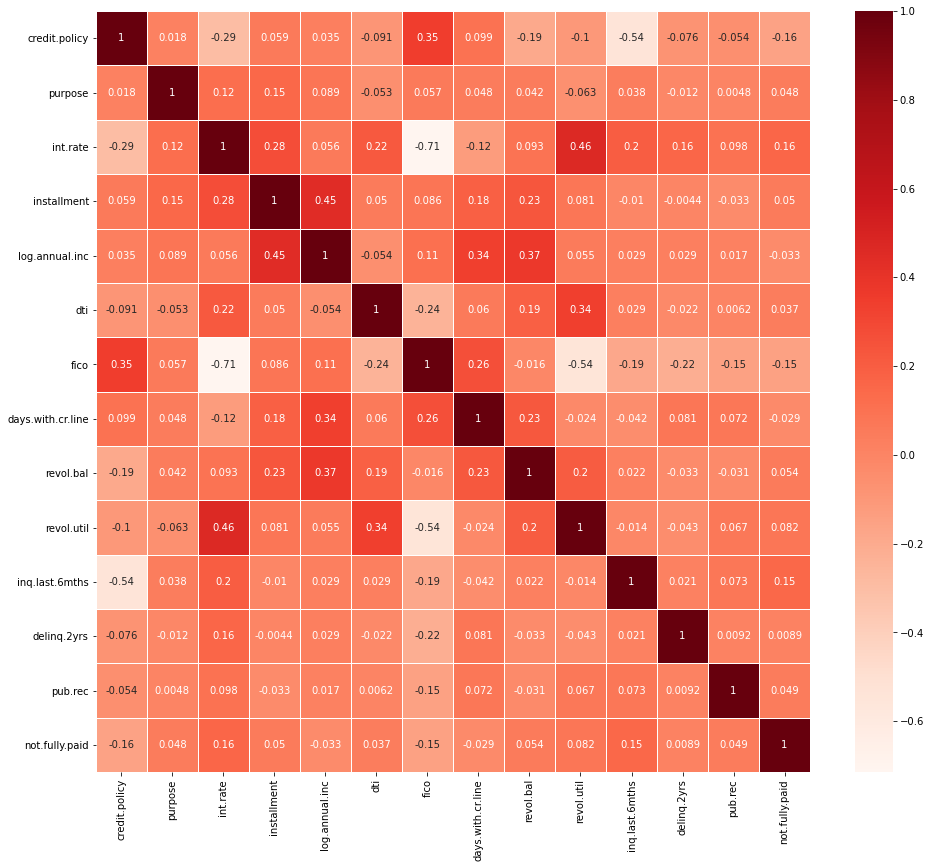

In [8]:
# View the correlation
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(df_loan.corr(), cmap='Reds', annot=True, linewidths=.5, ax=ax)

In [9]:
# Define the features
X = df_loan.drop('not.fully.paid',axis=1)
y = df_loan['not.fully.paid']

In [10]:
# Data not highly correlated. Check the unique features. 
x_val = X
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_val)
print(x_val.columns[constant_filter.get_support()])
x_num = x_val[x_val.columns[constant_filter.get_support()]]
print(len(x_val.columns), len(X.columns))

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')
13 13


In [11]:
# No unique feature. Now, split and train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Use various models 
# Initializing the Algorithms # I have tried a couple of them. Just showing a handful here
algorithm_list = {'LogisticReg': LogisticRegression(),
                  'DecisionT': DecisionTreeClassifier(), 
                  'RandForst':RandomForestClassifier(),
                  'SVModel': SVC(probability=True),
                  'XgbClass':XGBClassifier(use_label_encoder=False,eval_metric="mlogloss"),
                  'AdaClass': AdaBoostClassifier(),
                 }

# Fit the various model
for key,model in algorithm_list.items():
    try:
        model.fit(X_train, y_train)
        pred_test = model.predict(X_test)
        pred_train = model.predict(X_train)
        conf_matrix1 = metrics.confusion_matrix(y_train, pred_train)
        conf_matrix2 = metrics.confusion_matrix(y_test, pred_test)
        print(f"Classifier - {key: <8}    ||   ConfusionMatrix-TrainData -\n {conf_matrix1}")
        print(f"Classifier - {key: <8}    ||   ConfusionMatrix-TestData -\n {conf_matrix2}")
        print(f"Classifier - {key: <8}    ||   ClassificationReport-Test -\n {classification_report(y_test, pred_test)}")
        print(f"Classifier - {key: <8}    ||   ClassificationReport-Train -\n {classification_report(y_train, pred_train)}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass


Classifier - LogisticReg    ||   ConfusionMatrix-TrainData -
 [[6032    1]
 [1150    0]]
Classifier - LogisticReg    ||   ConfusionMatrix-TestData -
 [[2012    0]
 [ 382    1]]
Classifier - LogisticReg    ||   ClassificationReport-Test -
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2012
           1       1.00      0.00      0.01       383

    accuracy                           0.84      2395
   macro avg       0.92      0.50      0.46      2395
weighted avg       0.87      0.84      0.77      2395

Classifier - LogisticReg    ||   ClassificationReport-Train -
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6033
           1       0.00      0.00      0.00      1150

    accuracy                           0.84      7183
   macro avg       0.42      0.50      0.46      7183
weighted avg       0.71      0.84      0.77      7183

Classifier - DecisionT    ||   ConfusionMatr

In [12]:
# From the metrics, the AdaClass followed by the Xgboost is the best model. 
# Print the confusion Matrix for the test data
for key,model in algorithm_list.items():
    try:
        predictions = model.predict(X_test)
        conf_matrix       = metrics.confusion_matrix(y_test, predictions)
        print(f"Class - {key: <20} \n {conf_matrix}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

Class - LogisticReg          
 [[2012    0]
 [ 382    1]]
Class - DecisionT            
 [[1699  313]
 [ 286   97]]
Class - RandForst            
 [[2001   11]
 [ 370   13]]
Class - SVModel              
 [[2011    1]
 [ 383    0]]
Class - XgbClass             
 [[1947   65]
 [ 351   32]]
Class - AdaClass             
 [[1999   13]
 [ 375    8]]


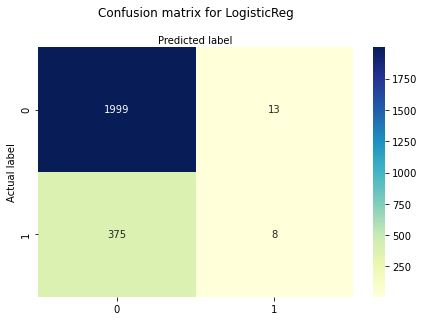

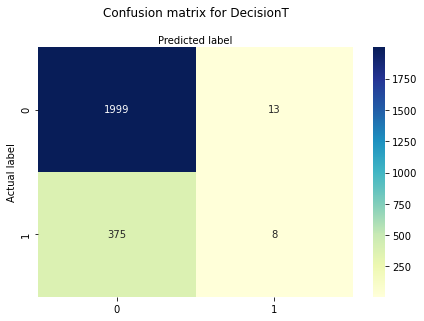

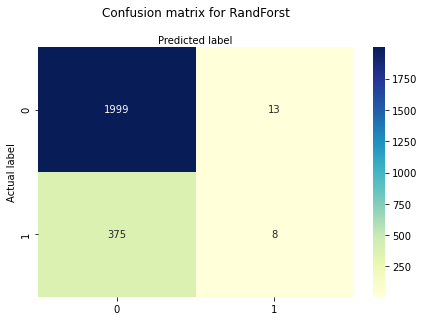

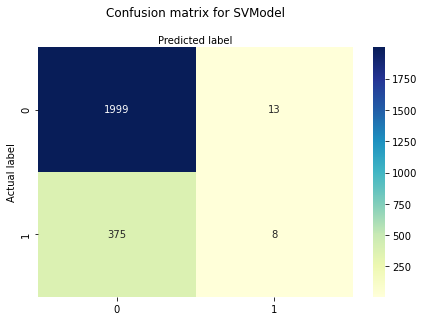

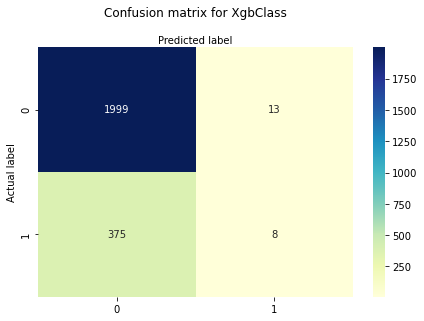

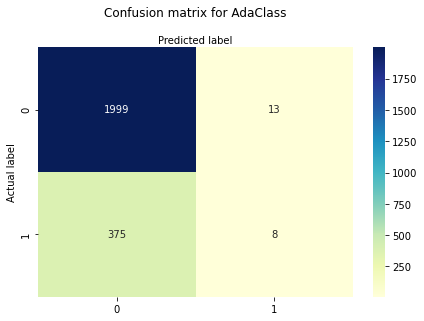

In [13]:
## Plot the confusion tree
for key,model in algorithm_list.items():
    try:
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix for '+key, y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass
 



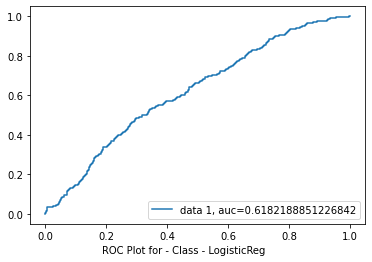

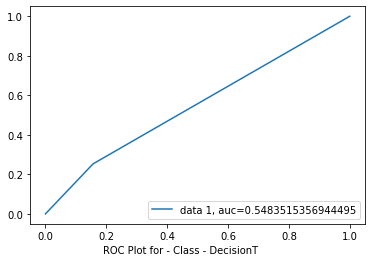

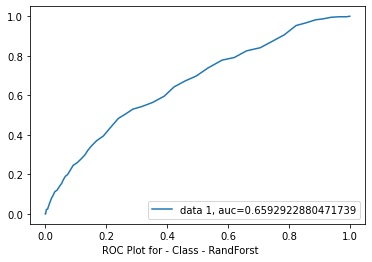

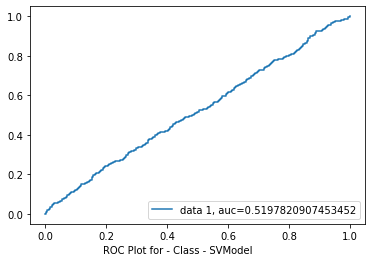

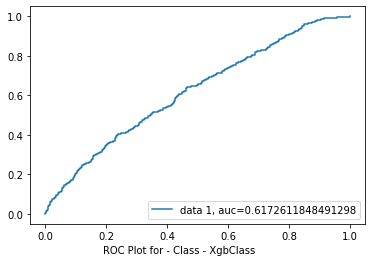

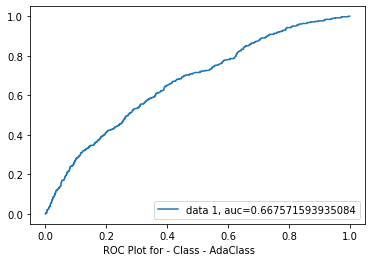

In [14]:
## Plot the ROC

for key,model in algorithm_list.items():
    try:
        model.fit(X_train,y_train)
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
        plt.figure()
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.xlabel(f"ROC Plot for - Class - {key: <20}")
        plt.show()
#        print(f"Class - {key: <20} \n {coeff}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

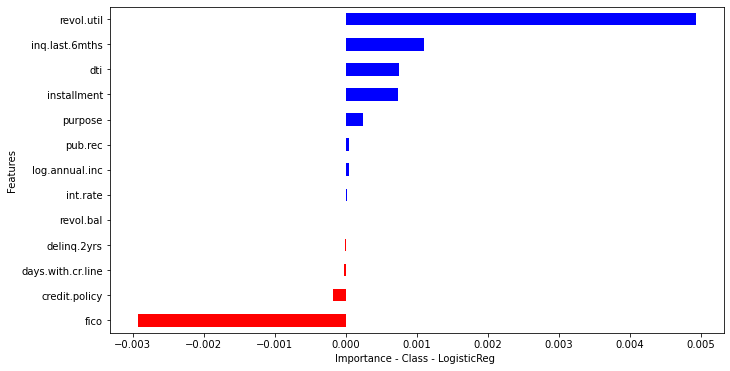

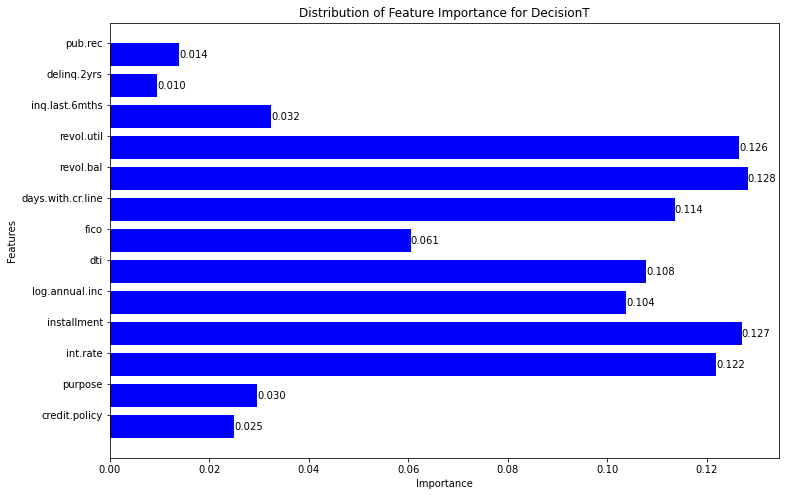

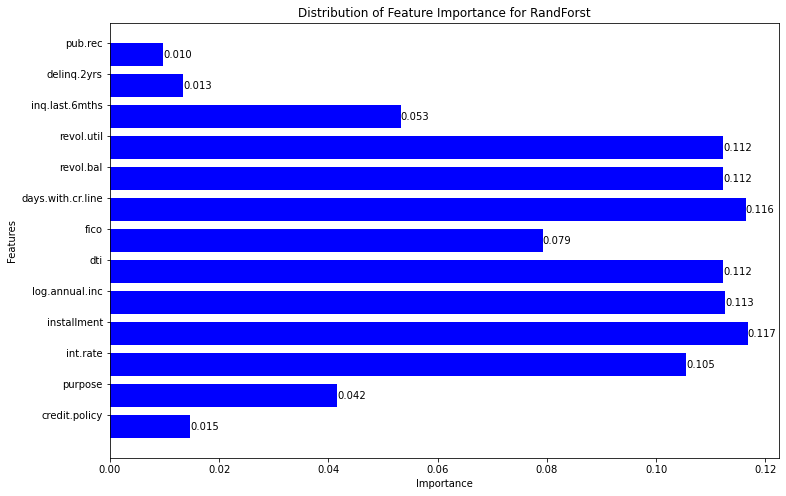

Exception occurred in 'SVC' object has no attribute 'feature_importances_'


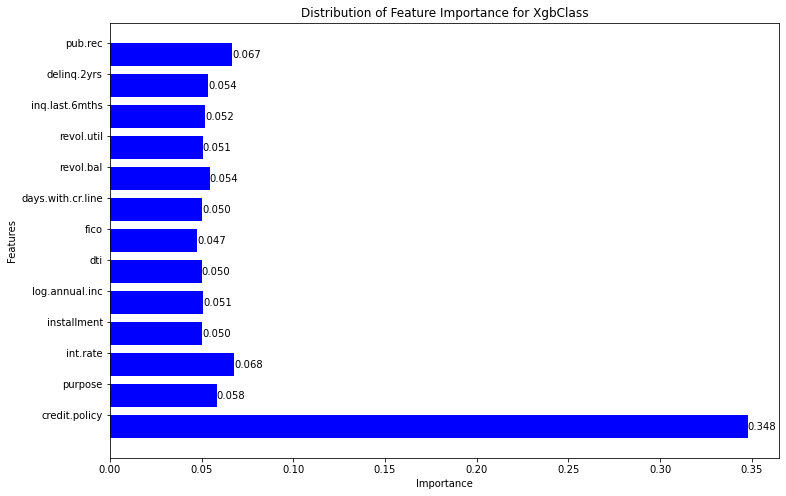

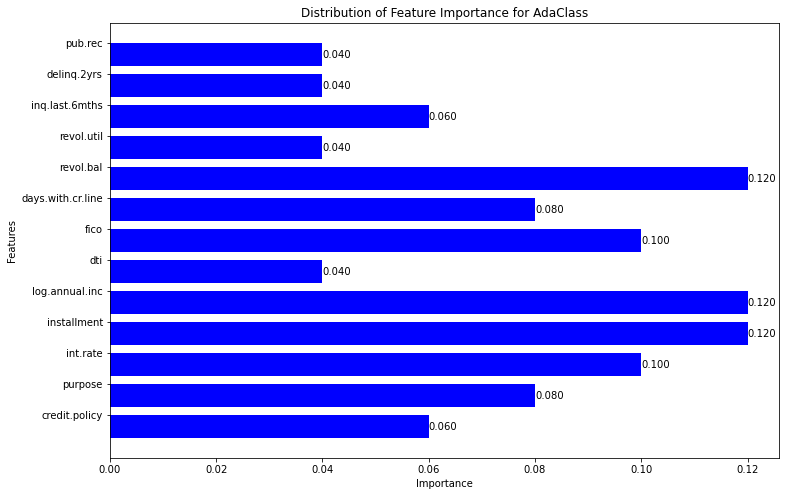

In [15]:
# Check the feature importance
for key,model in algorithm_list.items():
    try:
        if key == 'LogisticReg':
            coeff = pd.DataFrame.to_numpy(pd.DataFrame(np.transpose(model.coef_)))
            labels = list(X_test.columns)
            plt.figure()
            features = pd.DataFrame()
            features['Features'] = labels
            features['importance'] = coeff
            features.sort_values(by=['importance'], ascending=True, inplace=True)
            features['positive'] = features['importance'] > 0
            features.set_index('Features', inplace=True)
            features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
            plt.xlabel(f"Importance - Class - {key: <12}")
            plt.show()
           # print(f"Class - {key: <20} \n {coeff}")
        else:
            x = X_train.columns
            y = model.feature_importances_ # Note, no features for logisticRegression. See the plot above

            fig, ax = plt.subplots(figsize=(12,8))    
            width = 0.75 # the width of the bars 
            ind = np.arange(len(y))  # the x locations for the groups
            ax.barh(ind, y, width, color="blue")
            ax.set_yticks(ind+width/2)
            ax.set_yticklabels(x, minor=False)
            plt.title('Distribution of Feature Importance for '+key)
            plt.xlabel('Importance')
            plt.ylabel('Features')

            # Print the values on the barchart
            ax.bar_label(ax.containers[0],label_type='edge',fmt='%.3f')

            plt.show()
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass